In [ ]:
## Question 3

In [9]:
import os, sys
import numpy as np
import math

# Open folders corresponding to each category (class) 
pathPlant = "n00017222/"
dirsPlant = os.listdir(pathPlant)

pathGeo = "n00017222/"
dirsGeo = os.listdir(pathGeo)

pathFungus = "n12992868/"
dirsFungus = os.listdir(pathFungus)

pathSport = "n00523513/"
dirsSport = os.listdir(pathSport)

pathPerson = "n00007846/"
dirsPerson = os.listdir(pathPerson)

pathAnimal = "n00015388/"
dirsAnimal = os.listdir(pathAnimal)


# This would print all the files and directories


listImSml = []
    
from PIL import Image
for file in dirsPlant:
    im = Image.open("n00017222/"+file)
    listImSml.append(im.resize((64,64)))





In [38]:
## Read Plant images into a Numpy array

arrImg = np.zeros((1271,4096,3))
for i in range(0,1271):
    arrImg[i] = np.asarray((listImSml[i].getdata()))

In [41]:
#Single flat matrix of all images
mxFltImg = arrImg.reshape(1271,4096*3)

In [45]:
### Truncated SVD

from sklearn.utils.extmath import randomized_svd

U, Sigma, VT = randomized_svd(mxFltImg, n_components=5,
                                      n_iter=5,
                                      random_state=None)

In [54]:
import sklearn.decomposition as skd

trsvd = skd.TruncatedSVD(n_components=5)
trsvdFit = trsvd.fit(mxFltImg)
trsvdTransf = trsvd.transform(mxFltImg)

In [56]:
#plt.imshow((np.asarray(listImSml[0].getdata())[:,0]).reshape(64,64))

trsvdTransf.shape
    

(1271, 5)

In [65]:
a = np.zeros(10)
b = np.ones(5)
a[0:5] = b
print(a)

[ 1.  1.  1.  1.  1.  0.  0.  0.  0.  0.]


In [82]:
### RGB histogram
import skimage.exposure

mxFlatR = arrImg[:,:,0].reshape(1271,4096)
mxFlatG = arrImg[:,:,1].reshape(1271,4096)
mxFlatB = arrImg[:,:,2].reshape(1271,4096)

mxHistRGB = np.zeros((1271,768))


for i in range(0, 1271):
    mxHistRGB[i,0:256] = skimage.exposure.histogram(mxFlatR[i], nbins=256)[0]
    mxHistRGB[i,256:512] = skimage.exposure.histogram(mxFlatG[i], nbins=256)[0]
    mxHistRGB[i,512:768] = skimage.exposure.histogram(mxFlatB[i], nbins=256)[0]





In [96]:
arrPairwise = sklearn.metrics.pairwise.pairwise_distances(mxHistRGB)



def euclidean2(vector1, vector2):
    '''calculate the euclidean distance, use numpy.dot() function
    input: numpy.arrays or lists
    return: euclidean distance
    '''
    try:
        if type(vector1) == list:
            vector1 = np.array(vector1)
        if type(vector2) == list:
            vector2 = np.array(vector2)
        diff = vector2 - vector1
        squareDistance = np.dot(diff.T, diff)
        return squareDistance, math.sqrt(squareDistance)
    except TypeError as e:
        print ("Type error")
        raise
    except ValueError as e:
        print ("Value error")
        raise
    except:
        print ("Unexpected error")
        raise
        
print(euclidean2(mxHistRGB[1270], mxHistRGB[1269]))

print(arrPairwise[1270,1269])

#dist = np.linalg.norm([0,0,0], [1,1,1])

(16197424.0, 4024.602340604597)
4024.6023406


74 46 84


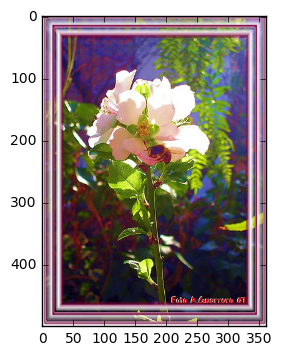

In [11]:
#plt.imshow((np.asarray(listImSml[0].getdata())[:,0]).reshape(64,64))
#np.asarray(listImSml[0].getdata())[:,0].shape

import matplotlib.pyplot as plt

im = Image.open("n00017222/"+dirsPlant[0])
rgb_im = im.convert('RGB')

r, g, b = rgb_im.getpixel((63,63))

type(rgb_im)
plt.imshow(rgb_im)

print(r,g,b)


In [64]:
#from skimage import transform


#imSml = im.resize((200,200))
#np.asarray(im.getdata())

#img2 = Image.fromarray(imSml, 'RGB')

#imSml.show()

listMxR = []
listMxG = []
listMxB = []

for imgDat in listImSml:

    npR = np.asarray(imgDat.getdata())[:,0]
    npG = np.asarray(imgDat.getdata())[:,1]
    npB = np.asarray(imgDat.getdata())[:,2]

    mxR = npR.reshape(64,64)
    mxG = npG.reshape(64,64)
    mxB = npB.reshape(64,64)
    
    listMxR.append(mxR)
    listMxG.append(mxG)
    listMxB.append(mxB)

#print(listMxR[1270].shape)
#print(listMxR[1270][0:10, :])
    

#len(dirsPlant)


In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))

im = Image.open("n00017222/"+dirsPlant[0])

#print(im.getdata())
#plt.imshow(listMxR[0])
#plt.imshow(listMxG[0])
#plt.imshow(listMxB[1], cmap = 'gray')

#plt.imshow(listMxB[1])

#np.asarray(im.getdata())[:,0]

listRU = []
listRsigma = []
listRV = []

for mx in listMxR:
    U, sigma, V = np.linalg.svd(mx)
    listRU.append(U)
    listRsigma.append(sigma)
    listRV.append(V)
    
    
listGU = []
listGsigma = []
listGV = []

for mx in listMxG:
    U, sigma, V = np.linalg.svd(mx)
    listGU.append(U)
    listGsigma.append(sigma)
    listGV.append(V)
    
    
listBU = []
listBsigma = []
listBV = []

for mx in listMxR:
    U, sigma, V = np.linalg.svd(mx)
    listBU.append(U)
    listBsigma.append(sigma)
    listBV.append(V)
                                    
                                    

In [17]:
listRU[0]

array([[-0.22555927, -0.13885768,  0.29991378, ...,  0.03116151,
        -0.00030574,  0.04611699],
       [-0.13665034, -0.03610348,  0.20213848, ..., -0.12673632,
         0.09993454,  0.04435943],
       [-0.19369231, -0.12556604,  0.26108982, ...,  0.20076228,
         0.10863668, -0.05975531],
       ..., 
       [-0.04144799,  0.13681591, -0.03922436, ...,  0.0208807 ,
         0.04682625, -0.02775002],
       [-0.17746518, -0.11091507,  0.20185512, ..., -0.26086933,
        -0.2153234 , -0.00348117],
       [-0.13934303, -0.06516778,  0.13575192, ...,  0.15736167,
        -0.02364484, -0.0314879 ]])

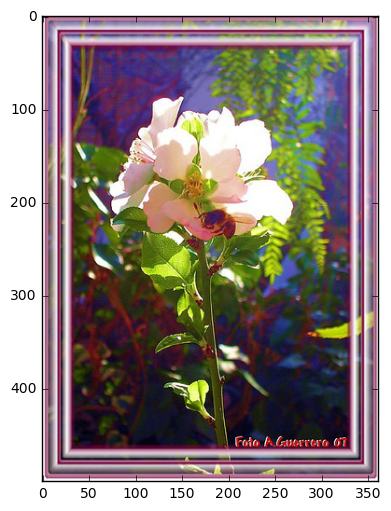

In [113]:

imggray = im.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(im);